In [8]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


# Problem 2 a. 

In [9]:
# x vectors age, course, likeStats
x = np.matrix([[20,1,0],
           [18,1,1],
           [15, 0,1], 
           [16,0,0],
           [17,1,1],
           [21,1,0],
           [23,1,0],
           [15,1,1],
           [17,0,1],
           [17,1,0]])

# the binary label Y 
y = [0,0,1,1,0,0,1,0,1,0]

In [10]:
# the theta and theta0 parameters 
theta = np.matrix([0.05, -3, 2.5])
theta0 = 0.3 

In [11]:
# A g(x) function  that takes the given parameters and the input x vectors, 
# and returns the value based on the formula g(x) = theta*x + theta0 

def g(a, matrix, b):
    value = []
    for row in matrix:
        row = row.getT()
        result = np.dot(a,row) + b
        result = round(float(result),3)
        value.append(result)
    return value

In [12]:
gx = g(theta, x, theta0)


In [13]:
# This function computes the yhat based on the classifier value and threshold 

def yhat(l,c):
    yhat = []
    for value in l:     
        if value <= c:
            yhat.append(0)
        else:
            yhat.append(1)
    return yhat

In [14]:
# This function calculates the false positve and false negative 

def classify(v,l):
    # value are the yhat, l is the list of true y
    fp = 0 
    fn = 0 
    for i in range(len(v)):
        if l[i] != v[i]:
            if l[i] > 0:     
                fn +=1 
            else:
                fp +=1
    return fp, fn
            

In [15]:
# l1 is the list of classifiers, l2 is the true ys 
# This function returns the threshold that has the minimal misclassification error 
def findmaxclassifier(l1,l2):
    minv = int(round(min(l1))) # min choice 
    maxv = int(max(l1))# max choice 
    # check each potential threshold 
    best = 1000
    threshold = 0
    for thresh in range(minv, maxv+1):
        # convert gx into values based on classifier threshhold
        value = yhat(l1,thresh)
        # calculate the False positive
        fp,fn = classify(value, l2)  
        # calculate the False negative
        # calculate the misclassification error
        error = (fp + fn)/len(l1)
        if error < best:
            best = error
            threshold = thresh
        elif error == best:
            if thresh < threshold:
                threshold = thresh
    return threshold

In [17]:
print(findmaxclassifier(gx,y)) # the threshold we choose to minimize the misclassification error is 1 

1


# Problem 2b. 


In [18]:
def sigmoid(x):
    result = []
    for i in range(len(x)):
        value = x[i]
        fy = (1 + math.exp(-value))**(-1)
        result.append(fy)
    return result 

In [19]:
def f(x):
    c = sigmoid(x)
    return c

In [20]:
# compute the fy value 
fx = f(gx)
print(fx)

[0.1544652650835347, 0.6681877721681662, 0.9720774262159271, 0.7502601055951177, 0.6570104626734988, 0.16110894957658525, 0.1750862681640398, 0.6341355910108007, 0.9746672967731282, 0.13587289700909427]


In [21]:
# To minimize the misclassification error, we used the function that we used a similar function used in part a. 

def findmaxclassifierb(l1,l2):
    # check each potential threshold 
    best = 1000
    threshold = 0
    for thresh in np.arange(0,1,0.1):
        # convert gx into values based on classifier threshhold
        value = yhat(l1,thresh)
        # calculate the False positive
        fp,fn = classify(value, l2)  
        # calculate the False negative
        # calculate the misclassification error
        error = (fp + fn)/len(l1)
        if error < best:
            best = error
            threshold = thresh
        elif error == best:
            if thresh < threshold:
                threshold = thresh
    return threshold

In [22]:
thresholdb = findmaxclassifierb(fx,y)
print(thresholdb) # This is the estimated threshold that minimize the misclassfication error

0.7000000000000001


In [23]:
# To calcualte the confusion matrix, we need FP, FN, TP, TF. 
# We would use a similar function used in part a, but with slight change 

# This function calculates the false positve and false negative 
def classify(v,l):
    # value are the yhat, l is the list of true y
    fp = 0 # False postive 
    fn = 0 # False negative 
    tp = 0 # True positve 
    tn = 0 # True false 
    for i in range(len(v)):
        # predict false 
        if l[i] != v[i]:
            if l[i] > 0:     
                fn +=1 
            else:
                fp +=1
        # Predict right 
        elif l[i] == v[i]:
            if l[i] > 0:
                tp += 1
            else:
                tn += 1 
    # make a matrix 
    confusion = [[fp, tp], [fn, tn]]
    return confusion

In [24]:
yhatb = yhat(fx,thresholdb) 
confusion_mat = classify(yhatb,y)
newline = "\n"
# The confusion matrix
print(f"TP:{confusion_mat[0][1]}, FP: {confusion_mat[0][0]} {newline}TN:{confusion_mat[1][1]}, FN: {confusion_mat[1][0]}")

TP:3, FP: 0 
TN:6, FN: 1


In [25]:
# precision 
precision = 3/3 
print(precision)

1.0


In [26]:
# Recall = True Positives / (True Positives + False Negatives)

recall = 3/(3+1)
print(recall)

0.75


In [27]:
#  F score = precision X recall / precision + recall
Fscore = 2*precision*recall/(precision + recall)
print(Fscore)

0.8571428571428571


# Problem 2c. 

In [28]:
def fptp(x,y,threhsold):
    TPR = []
    FPR = []
    # compute TPR and FPR all possible threshold 
    for thresh in threshold:
        value = yhat(x,thresh)
        mat = classify(value,y)
        tp = mat[0][1]
        fp = mat[0][0]
        pnum = sum(y)
        nnum = len(y) - pnum
        tpr = tp/pnum
        fpr = fp/nnum
        TPR.append(tpr)
        FPR.append(fpr)
    return TPR, FPR


In [29]:
threshold = np.arange(0,1,0.01)
TPR, FPR = fptp(fx,y,threshold)

Text(0.5, 1.0, 'ROC Curve for fx')

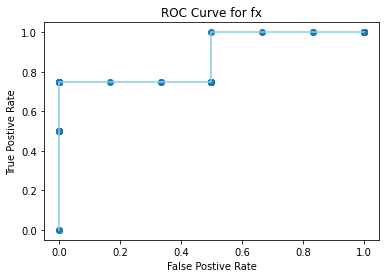

In [30]:
plt.plot(FPR,
         TPR,
         color = "skyblue",
        )
plt.scatter(FPR, TPR)
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.title("ROC Curve for fx")

In [31]:
# This function approximates the area under a discrete function curve 
def area(x,y):
    prev = y[0]
    area = 0 
    x = sorted(x)
    y = sorted(y)
    for i in range(1,len(y)):
        #print(f"i = {i}, area = {area}")
        if prev == y[i]:
            area += abs(y[i])*abs(x[i]-x[i-1])
        else:
            area += abs(y[i]-prev)*abs(x[i]-x[i-1])
        prev = y[i]
    return area
                

In [32]:
auc = area(FPR, TPR)
print(f"The AUC is {auc}")

The AUC is 0.875


# Problem 2d. 
Since when we use classifier as an ordered vector, and calculates the evaluation parameters such as FPR, and TPR based on its relative position (left or right) to the threshold, applying an monolithic function does not change each values position relative to the threshold, and thus the ROC curve will not change. 

# Problem 4.3.

In [71]:

data_4 = pd.read_csv("Titanic.csv",index_col = False, dtype = "object")

In [72]:
print(data_4.head())

  Survived Pclass     Sex   Age SibSp Parch     Fare Cabin Embarked
0        0      3    male  22.0     1     0     7.25   NaN        S
1        1      1  female  38.0     1     0  71.2833   C85        C
2        1      3  female  26.0     0     0    7.925   NaN        S
3        1      1  female  35.0     1     0     53.1  C123        S
4        0      3    male  35.0     0     0     8.05   NaN        S


In [73]:
print(data_4.describe())

       Survived Pclass   Sex   Age SibSp Parch  Fare    Cabin Embarked
count       891    891   891   714   891   891   891      204      889
unique        2      3     2    88     7     7   248      147        3
top           0      3  male  24.0     0     0  8.05  B96 B98        S
freq        549    491   577    30   608   678    43        4      644


From the table above, we know that the Age, and Fare variables are numerical. To encode the feature of these variables, we would need to transform those to the different categories. 

In [74]:
data_4["Age"] = pd.Series.map(data_4["Age"], float, na_action = "ignore")
print(data_4["Age"].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [75]:
# We would set age into 3 groups, youth, adult, and elder based on its 1st and 3rd quantile
def identAge(x):
    x = float(x)
    if x <= 21:
        group = "Youth"
    elif 21 < x <= 38:
        group = "Adult"
    else:
        group = "Elder"
    return group

In [76]:
data_4["Age"] = pd.Series.map(data_4["Age"], identAge, na_action = "ignore")

In [77]:
data_4["Fare"] = pd.Series.map(data_4["Fare"], float, na_action = "ignore")
print(data_4["Fare"].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [78]:
# To assign fare into 3 groups, we consider a fee lower than 8 would be low, from 8 to 20, would be medium
# and higher than 20 would be high cost based on its quantile
def idenFare(x):
    x = float(x)
    if x <= 8:
        cost = "low"
    elif 8 < x < 30:
        cost = "medium"
    else:
        cost = "high"
    return cost
        

In [79]:
data_4["Fare"] = pd.Series.map(data_4["Fare"], idenFare, na_action = "ignore")

To see if there are many NA values inside the dataset, we would need to clean it

In [80]:
# count the number of Nas in each column
print(data_4.isnull().sum(axis = 0))
print(len(data_4)) # number of samples 

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64
891


By looking at the number of NAs in each variable, we found that more than half of the carbin data are NAs. Since we only have 891 rows of the data, if we remove all the rows containing NAs, then we would not have many rows left. Thus, it may be more reasonable to remove the Cabin column first, especially when Pclass can be a possible indicator of the region of the cabin. 

In [81]:
# Drop the cabin column 
data_4 = data_4.drop(columns="Cabin")


In [82]:
# Drop the NA rows in the dataset
data_4  = data_4.dropna(how = "any")
data_4 = data_4.reset_index(drop=True)
print(len(data_4))

712


In [83]:
# recheck the number of NAs 
print(data_4.isnull().sum(axis = 0))


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [84]:
print(data_4.dtypes) # make sure the type of variables are all object 

Survived    object
Pclass      object
Sex         object
Age         object
SibSp       object
Parch       object
Fare        object
Embarked    object
dtype: object


Now, we are ready to fit model to our data. 


In [58]:
from chefboost import Chefboost as chef
from sklearn.model_selection import KFold
kcv = KFold(n_splits=10, random_state=10, shuffle=True)

# We first fit and train C4.5 Decision Tree

In [86]:
data_4 = data_4.rename(columns={'Survived':'Decision'})
config = {"algorithm":"C4.5","enableParallelism": True}

In [87]:
i = 1 
for train_index, test_index in kcv.split(data_4):
    print(f"#################################### Kfold is {i} ##############################################")
    i += 1
    X_train, X_test = data_4.iloc[train_index], data_4.iloc[test_index]
    model = chef.fit(X_train, validation_df = X_test, config = config)
    
    

    

#################################### Kfold is 1 ##############################################
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Decision']
[INFO]:  4 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  19.185977458953857  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  87.34375 % on  640  instances
Labels:  ['0' '1']
Confusion matrix:  [[361, 58], [23, 198]]
Precision:  86.1575 %, Recall:  94.0104 %, F1:  89.9128 %
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Decision']
-------------------------
Evaluate  validation set
-------------------------
Accuracy:  83.33333333333333 % on  72  instances
Labels:  ['0' '1']
Confusion matrix:  [[36, 8], [4, 24]]
Precision:  81.8182 %, Recall:  90.0 %, F1:  85.7143 %
#################################### Kfold is 2 ##############################################
['Pclass', 'Sex', 'Age', 'Sib

c:\users\henry\appdata\local\programs\python\python38-32\lib\site-packages\chefboost\commons\functions.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = predictions


-------------------------
finished in  11.0059494972229  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  88.125 % on  640  instances
Labels:  ['0' '1']
Confusion matrix:  [[360, 53], [23, 204]]
Precision:  87.1671 %, Recall:  93.9948 %, F1:  90.4523 %
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Decision']
-------------------------
Evaluate  validation set
-------------------------
Accuracy:  75.0 % on  72  instances
Labels:  ['0' '1']
Confusion matrix:  [[36, 13], [5, 18]]
Precision:  73.4694 %, Recall:  87.8049 %, F1:  80.0 %
#################################### Kfold is 3 ##############################################
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Decision']
[INFO]:  4 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  10.802147388458252  seconds
-------------------------
Evaluate  train set
-------------------------
A

# C4.5 Result 


From the above result, we see that the 3rd and 6th iteration has roughly similar and highest validation accuracy which is around 84.5%

For iteration 3:

It has precision 85%, Recall: 90.0%, and F-1 score 87.9%

For iteration 6:

It has precision 70%, Recall: 80.9% and F-1 score 75.5% 

# CART Decision Tree

In [65]:
config = {"algorithm":"CART","enableParallelism": True}
i = 1 
for train_index, test_index in kcv.split(data_4):
    print(f"#################################### Kfold is {i} ##############################################")
    i += 1
    X_train, X_test = data_4.iloc[train_index], data_4.iloc[test_index]
    model = chef.fit(X_train, validation_df = X_test, config = config)

#################################### Kfold is 1 ##############################################
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Decision']
[INFO]:  4 CPU cores will be allocated in parallel running
CART  tree is going to be built...
-------------------------
finished in  23.415143489837646  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  87.34375 % on  640  instances
Labels:  ['0' '1']
Confusion matrix:  [[361, 58], [23, 198]]
Precision:  86.1575 %, Recall:  94.0104 %, F1:  89.9128 %
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Decision']
-------------------------
Evaluate  validation set
-------------------------
Accuracy:  81.94444444444444 % on  72  instances
Labels:  ['0' '1']
Confusion matrix:  [[36, 9], [4, 23]]
Precision:  80.0 %, Recall:  90.0 %, F1:  84.7059 %
#################################### Kfold is 2 ##############################################
['Pclass', 'Sex', 'Age', 'SibSp'

-------------------------
finished in  12.983156442642212  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  88.29953198127924 % on  641  instances
Labels:  ['0' '1']
Confusion matrix:  [[354, 49], [26, 212]]
Precision:  87.8412 %, Recall:  93.1579 %, F1:  90.4215 %
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Decision']
-------------------------
Evaluate  validation set
-------------------------
Accuracy:  71.83098591549296 % on  71  instances
Labels:  ['0' '1']
Confusion matrix:  [[36, 12], [8, 15]]
Precision:  75.0 %, Recall:  81.8182 %, F1:  78.2609 %


# Result for CART

Based on the result shown above, 

The 3rd and 6th iteration has, again, similar and highest prediction accuracy. 

For 3rd iteration:
Precision is 85.1%, Recall: 90.9%, and F-1 score: 87.9% 

For th iteration:
Precision is 70.8%, Recall: 80.9%, and F-1 score: 75.5% 

# Summary 

By comparison of Precision, Recall, and F-1 score, the third iteration in the two models both returns a better result. Therefore, we would choose iteration 3 instead of the iteration 6. 
Since both C4.5 and CART returns a very similar result, they may built up a similar decision tree based on the data. Thus, I am indifferent to pick C4.5 or CART. 